In [22]:
import requests
import json
from Resources.API_Key import api_key
import pandas as pd

In [4]:
# Using the API key to access BLS data   
url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"

series_id_lp = "PRS85006092"

payload = {
    "seriesid": [series_id_lp],
    "startyear": "2018",
    "endyear": "2024",
    "registrationkey": api_key
}

response = requests.post(url, json=payload)

if response.status_code == 200:
    data = response.json()
    print(json.dumps(data, indent=4))
else:
    print(f"Error {response.status_code}")
    

{
    "status": "REQUEST_SUCCEEDED",
    "responseTime": 175,
    "message": [],
    "Results": {
        "series": [
            {
                "seriesID": "PRS85006092",
                "data": [
                    {
                        "year": "2024",
                        "period": "Q03",
                        "periodName": "3rd Quarter",
                        "latest": "true",
                        "value": "2.2",
                        "footnotes": [
                            {}
                        ]
                    },
                    {
                        "year": "2024",
                        "period": "Q02",
                        "periodName": "2nd Quarter",
                        "value": "2.1",
                        "footnotes": [
                            {
                                "code": "R",
                                "text": "revised"
                            }
                        ]
                    },
   

In [5]:
# Converting the data into a dataframe
series_data = data['Results']['series'][0]['data']
labor_productivity_df = pd.DataFrame(series_data)

# Formatting the data
quarter_mapping = {
    "Q01": "Q1: Jan 1 - Mar 31",
    "Q02": "Q2: Apr 1 - Jun 30",
    "Q03": "Q3: Jul 1 - Sep 30",
    "Q04": "Q4: Oct 1 - Dec 31"
}

# Extra formatting for the data that came from the API request
labor_productivity_df['quarter'] = labor_productivity_df['period'].map(quarter_mapping)
labor_productivity_df['year'] = pd.to_numeric(labor_productivity_df['year'])
labor_productivity_df['percent_change'] = pd.to_numeric(labor_productivity_df['value'])
labor_productivity_df = labor_productivity_df[['year', 'quarter', 'percent_change']]
labor_productivity_df = labor_productivity_df.sort_values(by=['year', 'quarter']).reset_index(drop=True)

In [6]:
# Reading in the Excel file that was used for this data frame
file_path = "Resources/unit_labor_costs.xlsx"
sheet_name = "BLS Data Series"
unit_labor_costs_df = pd.read_excel(file_path)
unit_labor_costs_df = unit_labor_costs_df.melt(id_vars =["Year"],
                                               var_name="quarter",
                                               value_name="percent_change")

#Formatting the data so that it matches the previous data frame
quarter_mapping2 = {
    "Qtr1": "Q1: Jan 1 - Mar 31",
    "Qtr2": "Q2: Apr 1 - Jun 30",
    "Qtr3": "Q3: Jul 1 - Sep 30",
    "Qtr4": "Q4: Oct 1 - Dec 31"
}
unit_labor_costs_df["quarter"] = unit_labor_costs_df["quarter"].map(quarter_mapping2)
unit_labor_costs_df = unit_labor_costs_df.sort_values(by=["Year", "quarter"]).reset_index(drop=True)
unit_labor_costs_df = unit_labor_costs_df.dropna(subset=["percent_change"])

In [7]:
# Rinse and repeat for the next excel sheet
file_path2 = "Resources/real_hourly_compensation.xlsx"
sheet_name2 = sheet_name
real_hourly_compensation_df = pd.read_excel(file_path2)
real_hourly_compensation_df = real_hourly_compensation_df.melt(id_vars = ["Year"],
                                                               var_name="quarter",
                                                               value_name="percent_change")

real_hourly_compensation_df["quarter"] = real_hourly_compensation_df["quarter"].map(quarter_mapping2)
real_hourly_compensation_df = real_hourly_compensation_df.sort_values(by=["Year", "quarter"]).reset_index(drop=True)
real_hourly_compensation_df = real_hourly_compensation_df.dropna(subset=["percent_change"])

In [8]:
file_path3 = "Resources/total_factor_productivity.xlsx"
sheet_name3 = sheet_name
total_factor_productivity_df = pd.read_excel(file_path3)

In [9]:
# Labor Productivity DataFrame
labor_productivity_df

,year,quarter,percent_change
0,2018,Q1: Jan 1 - Mar 31,1.5
1,2018,Q2: Apr 1 - Jun 30,0.0
2,2018,Q3: Jul 1 - Sep 30,1.2
3,2018,Q4: Oct 1 - Dec 31,-0.7
4,2019,Q1: Jan 1 - Mar 31,3.4
5,2019,Q2: Apr 1 - Jun 30,2.4
6,2019,Q3: Jul 1 - Sep 30,4.6
7,2019,Q4: Oct 1 - Dec 31,3.8
8,2020,Q1: Jan 1 - Mar 31,-1.1
9,2020,Q2: Apr 1 - Jun 30,20.2


In [10]:
# Unit Labor Costs DataFrame
unit_labor_costs_df

,Year,quarter,percent_change
0,2018,Q1: Jan 1 - Mar 31,1.1
1,2018,Q2: Apr 1 - Jun 30,2.0
2,2018,Q3: Jul 1 - Sep 30,2.8
3,2018,Q4: Oct 1 - Dec 31,2.1
4,2019,Q1: Jan 1 - Mar 31,6.5
5,2019,Q2: Apr 1 - Jun 30,-2.3
6,2019,Q3: Jul 1 - Sep 30,-4.0
7,2019,Q4: Oct 1 - Dec 31,3.4
8,2020,Q1: Jan 1 - Mar 31,11.8
9,2020,Q2: Apr 1 - Jun 30,3.7


In [11]:
# Real Hourly Compensation Data Frame
real_hourly_compensation_df

,Year,quarter,percent_change
0,2018,Q1: Jan 1 - Mar 31,-0.8
1,2018,Q2: Apr 1 - Jun 30,-0.1
2,2018,Q3: Jul 1 - Sep 30,2.2
3,2018,Q4: Oct 1 - Dec 31,-0.2
4,2019,Q1: Jan 1 - Mar 31,8.8
5,2019,Q2: Apr 1 - Jun 30,-2.7
6,2019,Q3: Jul 1 - Sep 30,-1.1
7,2019,Q4: Oct 1 - Dec 31,4.1
8,2020,Q1: Jan 1 - Mar 31,9.2
9,2020,Q2: Apr 1 - Jun 30,28.8


In [12]:
# Total Factor Productivity Data Frame
total_factor_productivity_df

,Year,Annual
0,2018,100.633
1,2019,101.987
2,2020,101.756
3,2021,105.053
4,2022,103.343
5,2023,104.107


In [13]:
file_path3 = "Resources/labor-productivity-detailed-industries.xlsx"
sheet_name3 = "MachineReadable"
industry_data_df = pd.read_excel(file_path3, sheet_name3)
industry_data_df = industry_data_df[industry_data_df["Year"] >= 2018]
selected_columns = ["Sector", "Industry", "Measure", "Units", "Year", "Value"]
industry_data_df = industry_data_df[selected_columns]
industry_data_df.head(10)

,Sector,Industry,Measure,Units,Year,Value
30,Mining,Mining,Labor productivity,% Change from previous year,2018,2.1
31,Mining,Mining,Labor productivity,% Change from previous year,2019,7.1
32,Mining,Mining,Labor productivity,% Change from previous year,2020,22.2
33,Mining,Mining,Labor productivity,% Change from previous year,2021,4.9
34,Mining,Mining,Labor productivity,% Change from previous year,2022,-6.9
35,Mining,Mining,Labor productivity,% Change from previous year,2023,1.0
66,Mining,Mining,Real sectoral output,% Change from previous year,2018,12.1
67,Mining,Mining,Real sectoral output,% Change from previous year,2019,8.5
68,Mining,Mining,Real sectoral output,% Change from previous year,2020,-6.8
69,Mining,Mining,Real sectoral output,% Change from previous year,2021,1.2


In [29]:
industry_data_filtered = industry_data_df[industry_data_df["Measure"] == "Unit labor costs"]
average_percent_change_df = industry_data_filtered.groupby(["Sector", "Year"])["Value"].mean().reset_index()
average_percent_change_df.head(10)

,Sector,Year,Value
0,Accommodation and Food Services,2018,52.688964
1,Accommodation and Food Services,2019,53.426750
2,Accommodation and Food Services,2020,56.465536
3,Accommodation and Food Services,2021,49.246214
4,Accommodation and Food Services,2022,62.352214
5,Accommodation and Food Services,2023,60.194300
6,Administrative and Support and Waste Managemen...,2018,39.146917
7,Administrative and Support and Waste Managemen...,2019,43.705750
8,Administrative and Support and Waste Managemen...,2020,58.409000
9,Administrative and Support and Waste Managemen...,2021,38.089000


In [ ]:
#Create Line Graph to visualize data for Real Hourly Compensation DataFrame
import matplotlib.pyplot as plt

real_hourly_compensation_df = real_hourly_compensation_df.sort_values("Year")

# Create a line graph
plt.figure(figsize=(10, 5))
plt.plot(real_hourly_compensation_df['Year'], real_hourly_compensation_df['percent_change'], marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.title('Years vs. Percent Change')

#Display grid
plt.grid(True)
plt.show()

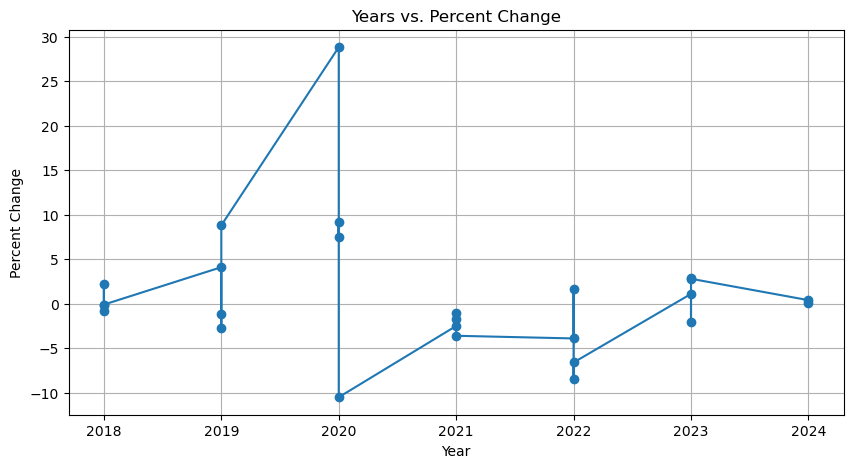

In [18]:
#Create Line Graph to visualize data for Real Hourly Compensation DataFrame
import matplotlib.pyplot as plt

real_hourly_compensation_df = real_hourly_compensation_df.sort_values("Year")

# Create a line graph
plt.figure(figsize=(10, 5))
plt.plot(real_hourly_compensation_df['Year'], real_hourly_compensation_df['percent_change'], marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.title('Years vs. Percent Change')

#Display grid
plt.grid(True)
plt.show()


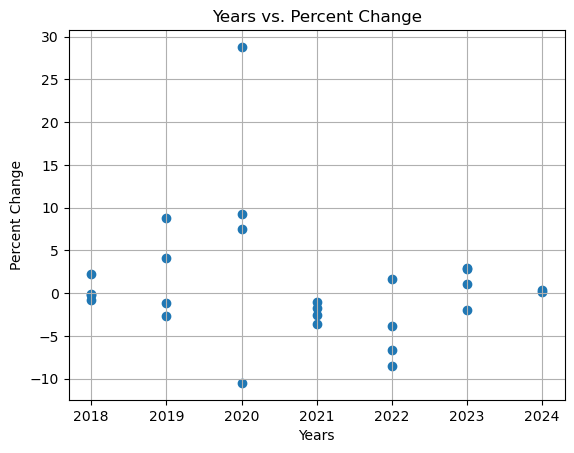

In [21]:
#Create Scatter Plot Graph to visualize data for Real Hourly Compensation DataFrame
x_values = real_hourly_compensation_df['Year']
y_values = real_hourly_compensation_df['percent_change']
plt.scatter(x_values, y_values) 

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Percent Change')
plt.title("Years vs. Percent Change")

# Show plot
plt.grid(True)
plt.show()